Jitter is 32655859146.36 ps


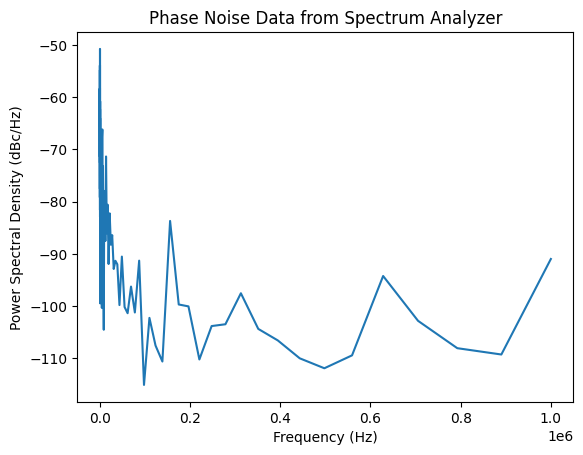

In [7]:
# Example code to convert phase noise data from a spectrum analyzer to jitter and show it
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# If you don't have a phase noise data file, you can generate one here
# The data will be saved in 'phase_noise_freq_Hz.txt' and 'phase_noise_psd_dBc_Hz.txt'
if not os.path.exists('phase_noise_freq_Hz.txt'):
    freq = np.logspace(1, 6, 100)
    psd = -50 - 10*np.log10(freq) + 10*np.random.normal(size=len(freq))
    np.savetxt('phase_noise_freq_Hz.txt', freq)
    np.savetxt('phase_noise_psd_dBc_Hz.txt', psd)

    plt.figure()
    plt.plot(freq, psd)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dBc/Hz)')
    plt.title('Phase Noise Data')
    plt.show()

# Load phase noise data from a spectrum analyzer
# The data should be in the format of frequency (Hz) and power spectral density (dBc/Hz)
freq = np.loadtxt('phase_noise_freq_Hz.txt')
psd = np.loadtxt('phase_noise_psd_dBc_Hz.txt')


# Rest of your code remains the same

# Convert phase noise data to jitter
# The unit of jitter is second
jitter = np.sqrt(integrate.trapezoid(10**(psd/10), x=freq))

print(f'Jitter is {jitter*1e12:.2f} ps')

# Plot the phase noise data
plt.plot(freq, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dBc/Hz)')
plt.title('Phase Noise Data from Spectrum Analyzer')
plt.show()
